In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import matplotlib
matplotlib.use('agg')

In [3]:
import matplotlib.pyplot as plt
from collections import namedtuple

import data
import panel as pn
import numpy as np
import pandas as pd
pn.extension()
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

In [4]:
import pandas as pd
import numpy as np

dates = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
segments = ['Segment A', 'Segment B', 'Segment C']

# Ensuring that segments and sample types are repeated appropriately to match the date length
segments_array = np.tile(np.random.choice(segments, len(dates)), 2)  # Repeated for In-Sample and Out-of-Sample
samples_array = np.array(['In-Sample', 'Out-of-Sample'] * len(dates))

arrays = [np.tile(dates, 2), segments_array, samples_array]  # Tiling dates to ensure its length matches with others

index = pd.MultiIndex.from_arrays(arrays, names=('Date', 'Segment', 'Sample'))
df_bydate_segment = pd.DataFrame({'Model1': np.random.randn(len(dates) * 2), 
                           'Actual': np.random.randn(len(dates) * 2)}, index=index)

In [5]:
# Assuming you want MOBs from 1 to 12
mobs = np.arange(1, 13)

segments = ['Segment A', 'Segment B', 'Segment C']

# Ensuring that segments and sample types are repeated appropriately to match the MOB length
segments_array = np.tile(np.random.choice(segments, len(mobs)), 2)  # Repeated for In-Sample and Out-of-Sample
samples_array = np.array(['In-Sample', 'Out-of-Sample'] * len(mobs))

arrays = [np.tile(mobs, 2), segments_array, samples_array]  # Tiling mobs to ensure its length matches with others

index = pd.MultiIndex.from_arrays(arrays, names=('MOB', 'Segment', 'Sample'))
df_mob = pd.DataFrame({'Model1': np.random.randn(len(mobs) * 2), 
                       'Actual': np.random.randn(len(mobs) * 2)}, index=index)
# df_mob

In [6]:
def generate_model_data(multi_index, model_ids):
    df = pd.DataFrame(np.random.rand(len(multi_index), len(model_ids)), 
                      index=multi_index, columns=model_ids)
    df['Actual'] = df[model_ids[:-1]].mean(axis=1)
    return df

In [7]:
model_ids, _ = data.get_model_df()

In [8]:
dates = pd.date_range(start="2006-01-01", end="2022-12-31", freq='M')
categories = ['In-Sample', 'Out-of-Sample']
multi_index_bydate = pd.MultiIndex.from_product([categories, dates], names=['Category', 'Date'])
df_bydate = generate_model_data(multi_index_bydate, model_ids)
last_index_name = df_bydate.index.names[-1]
print(last_index_name) 


Date


In [9]:
mobs = np.arange(1, 180)  # 12 months
multi_index_mob = pd.MultiIndex.from_product([categories, mobs], names=['Category', 'MOB'])
df_bymob = generate_model_data(multi_index_mob, model_ids)
last_index_name = df_bymob.index.names[-1]
print(last_index_name)

MOB


In [10]:
dates_daily = pd.date_range(start="2006-01-01", end="2022-12-31", freq='M')
segments = ['Segment A', 'Segment B', 'Segment C']
samples = ['In-Sample', 'Out-of-Sample']


multi_index_segment = pd.MultiIndex.from_product([segments, samples, dates_daily], names=('Segment', 'Category', 'Date'))

df_bydate_bysegment2 = generate_model_data(multi_index_segment, model_ids)
df_bydate_bysegment2 = df_bydate_bysegment2.sort_index(level=['Segment', 'Category', 'Date'])
last_index_name = df_bydate_bysegment2.index.names[-1]
print(last_index_name)

Date


In [11]:
performance_collection = {
    'df_bydate': df_bydate,
    'df_bymob': df_bymob,
    'df_bydate_bysegment2': df_bydate_bysegment2
}

In [15]:
# df_bydate_bysegment2

In [214]:
# performance_collection['df_bydate'].loc[('In-Sample', slice(None)),['101', 'Actual']]

In [213]:
# df.loc[('In-Sample', slice(None)), [model_id, 'Actual']]

Column
    [0] Row
        [0] Select(name='Model Selector', options=['101', '102', ...], value='101')
        [1] Select(name='Data Selector', options=['df_bydate', ...], value='df_bydate')
        [2] Markdown(str)
    [1] ParamFunction(function, _pane=Column, defer_load=False)
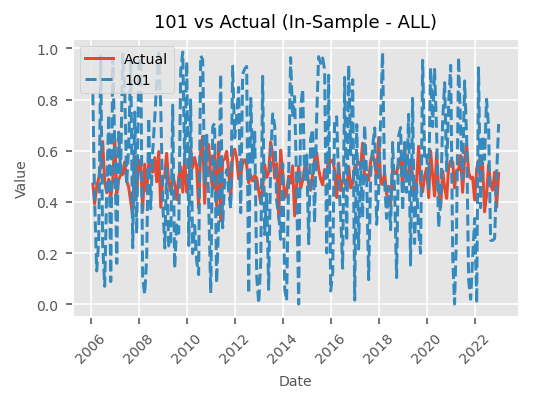
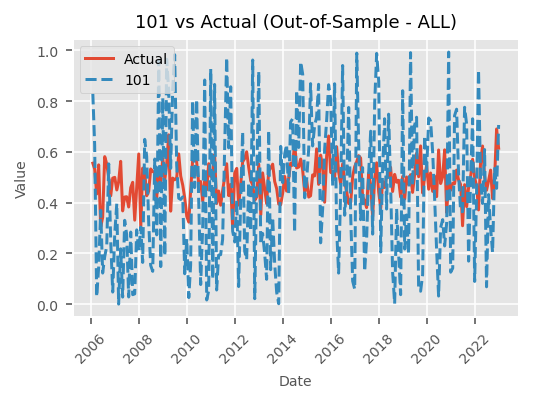

In [18]:
import panel as pn
import matplotlib.pyplot as plt

def plot_segment_data(df, segment, model_id):
    print(model_id)
    plots = pn.Row()
    last_index = df.index.names[-1]

    for sample_type in ['In-Sample', 'Out-of-Sample']:
       
   
        selected_data = df.loc[(segment, sample_type, slice(None)), [model_id, 'Actual']]
 
        selected_data= selected_data.reset_index().set_index(last_index)
        selected_data = selected_data.sort_values(by=last_index)
        
        
        fig, ax = plt.subplots(figsize=(4, 2.5))

        ax.plot(selected_data.index , selected_data['Actual'], label="Actual")
        ax.plot(selected_data.index, selected_data[model_id], label=f"{model_id}", linestyle='--')

        ax.set_title(f"{model_id} vs Actual ({sample_type} - {segment})", fontsize=9)
        
        ax.legend(loc='upper left', fontsize=7)
        ax.set_xlabel(last_index, fontsize=7)
        ax.set_ylabel("Value", fontsize=7)
        
        # Adjust the font size of the tick labels
        ax.tick_params(axis='x', labelsize=7)
        ax.tick_params(axis='y', labelsize=7)   
        plt.xticks(rotation=45)
        
        plt.close(fig)
        
        plots.append(pn.pane.Matplotlib(fig, tight=True))

    return plots

def plot_data(df, model_id):
    plots = pn.Row()
    last_index = df.index.names[-1]
    for sample_type in ['In-Sample', 'Out-of-Sample']:
        
   
        selected_data = df.loc[(sample_type, slice(None)), [model_id, 'Actual']]
 
        selected_data= selected_data.reset_index().set_index(last_index)
        selected_data = selected_data.sort_values(by=last_index)
        
        
        fig, ax = plt.subplots(figsize=(4, 2.5))

        ax.plot(selected_data.index , selected_data['Actual'], label="Actual")
        ax.plot(selected_data.index, selected_data[model_id], label=f"{model_id}", linestyle='--')

        ax.set_title(f"{model_id} vs Actual ({sample_type} - ALL)", fontsize=9)
        
        ax.legend(loc='upper left', fontsize=7)
        ax.set_xlabel(last_index, fontsize=7)
        ax.set_ylabel("Value", fontsize=7)
        
        # Adjust the font size of the tick labels
        ax.tick_params(axis='x', labelsize=7)
        ax.tick_params(axis='y', labelsize=7)   
        plt.xticks(rotation=45)
        
        plt.close(fig)
        
        plots.append(pn.pane.Matplotlib(fig, tight=True))

    return plots

def update_plots_for_segments(event1, event2):
 
    model_id = model_selector3.value
    data  = data_selector2.value
    col = pn.Column()
    
    df = performance_collection[data_selector2.value]
    levels =  len(df.index.names)
    
    if levels > 2:
        for segment in  df.index.get_level_values(0).unique():
            col.append(pn.Row(pn.pane.Markdown(f"## {segment}"), plot_segment_data(df, segment, model_id))) 
    else:
        col.append(pn.Row(pn.pane.Markdown(f"## ALL"), plot_data(df, model_id)))
    return col

# Creating a model selector
model_selector3 = pn.widgets.Select(name='Model Selector', options=model_ids[:-1])
data_selector2 = pn.widgets.Select(name='Data Selector', options=list(performance_collection.keys()))

# model_selector3.param.watch(update_plots_for_segments, 'value') 
# data_selector2.param.watch(update_plots_for_segments, 'value')

# Setting up the layout for the third tab
def third_tab_layout():
    model_id = model_selector3.value
    plots = update_plots_for_segments(None, None)
    top_row = pn.Row(model_selector3,data_selector2, pn.pane.Markdown("## Model Summary"))
    layout = pn.Column(top_row, pn.panel(pn.bind(update_plots_for_segments, model_selector3, data_selector2)) )
    
    return layout

third_tab = third_tab_layout()
third_tab 

In [188]:
data_selector2.value

'df_bydate'

In [17]:
def plot_segment_data(event):
    print(data_selector.value, model_selector3.value)
    plots = []
    df = performance_collection[data_selector.value]
    model_id = model_selector3.value
    levels = len(df.index.names)
    last_index_name = df.index.names[-1]
     
    if levels == 2:
        for category in ['In-Sample', 'Out-of-Sample']:
            selected_data = df.loc[(category, slice(None)), [model_id, 'Actual']]
            selected_data = selected_data.reset_index().set_index(last_index_name)
            selected_data = selected_data.sort_values(by=last_index_name)
            
            fig, ax = plt.subplots(figsize=(4, 2.5))
            ax.plot(selected_data.index, selected_data['Actual'], label="Actual")
            ax.plot(selected_data.index, selected_data[model_id], label=f"{model_id}", linestyle='--')
            ax.set_title(f"{model_id} vs Actual ({category})", fontsize=9)
            
            finalize_plot(ax)
            plots.append(pn.pane.Matplotlib(fig, tight=True))
    else:
        for segment in segments:
            for category in ['In-Sample', 'Out-of-Sample']:
                selected_data = df.loc[(segment, category, slice(None)), [model_id, 'Actual']]
                selected_data = selected_data.reset_index().set_index(last_index_name)
                selected_data = selected_data.sort_values(by=last_index_name)
                
                fig, ax = plt.subplots(figsize=(4, 2.5))
                ax.plot(selected_data.index, selected_data['Actual'], label="Actual")
                ax.plot(selected_data.index, selected_data[model_id], label=f"{model_id}", linestyle='--')
                ax.set_title(f"{model_id} vs Actual ({category} - {segment})", fontsize=9)
                
                finalize_plot(ax)
                plots.append(pn.pane.Matplotlib(fig, tight=True))
                
    return pn.Column(*plots)


def plot_segment_data(data_type, model_id):
    
    plots = pn.Row() 
    df = performance_collection[data_selector.value]
    model_id = model_selector3.value
    levels = len(df.index.names)
    last_index_name = df.index.names[-1]
  

    for category in ['In-Sample', 'Out-of-Sample']:
        
        levels =  len(df_bydate.index.names)
        
        if levels == 2:
            selected_data = df.loc[category, (slice(None)), [model_id, 'Actual']]      

            selected_data= selected_data.reset_index().set_index(last_index_name)
            selected_data = selected_data.sort_values(by=last_index_name)
        
        
        fig, ax = plt.subplots(figsize=(4, 2.5))

        ax.plot(selected_data.index , selected_data['Actual'], label="Actual")
        ax.plot(selected_data.index, selected_data[model_id], label=f"{model_id}", linestyle='--')

        ax.set_title(f"{model_id} vs Actual ({sample_type} - {segment})", fontsize=9)
        
        ax.legend(loc='upper left', fontsize=7)
        ax.set_xlabel("Date", fontsize=7)
        ax.set_ylabel("Value", fontsize=7)
        
        # Adjust the font size of the tick labels
        ax.tick_params(axis='x', labelsize=7)
        ax.tick_params(axis='y', labelsize=7)   
        plt.xticks(rotation=45)
        
        plt.close(fig)
        
        plots.append(pn.pane.Matplotlib(fig, tight=True))


def finalize_plot(ax):
    ax.legend(loc='upper left', fontsize=7)
    ax.set_xlabel(last_index_name, fontsize=7)
    ax.set_ylabel("Value", fontsize=7)
    ax.tick_params(axis='x', labelsize=7)
    ax.tick_params(axis='y', labelsize=7)   
    plt.xticks(rotation=45)
    plt.close(ax.figure)

    
    
# Setting up the layout for the third tab
def third_tab_layout():
    model_id = model_selector3.value
    plots = plot_segment_data(None)
    top_row = pn.Row(model_selector3, data_selector, pn.pane.Markdown("## Model Summary"))
    layout = pn.Column(top_row, plots)
    return layout

# Creating a model selector
model_selector3 = pn.widgets.Select(name='Model Selector', options=model_ids)
data_selector = pn.widgets.Select(name='Data Selector', options=list(performance_collection.keys()))

model_selector3.param.watch(plot_segment_data, 'value') 
data_selector.param.watch(plot_segment_data, 'value')

third_tab = third_tab_layout()
third_tab

TypeError: plot_segment_data() missing 1 required positional argument: 'model_id'